In [1]:
import glob
from matplotlib import pyplot as plt
import numpy as np
import pyslha

## Validation of efficiencies for a 1.4 TeV gluino and a 1300 GeV neutralino

#### ATLAS Values

In [2]:
nobs = 0
bg = 0.02
bg_error = 0.02
lum = 32.7
xsecSRlimit = 0.0914421298569*1e-3 #From  statistics.upperLimit(0,0.02,0.02,32.7)
#gluino xsection at mgluino=1400: 25.2977*fb, weight for 1k events = 0.8272
atlasULs = np.genfromtxt('../recastCode/ATLAS_data/HEPData-ins1630632-v2-csv/Table10.csv',
                         delimiter=',',names=True,skip_header=10,skip_footer=45)

In [3]:
print(atlasULs)

[(3.0000e-03, 0.739826  ) (1.0000e-02, 0.0205294 )
 (4.0000e-02, 0.00342003) (1.0000e-01, 0.00245111)
 (1.0000e+00, 0.00392301) (3.0000e+00, 0.00767325)
 (1.0000e+01, 0.0288558 ) (2.4538e+01, 0.0884243 )]


#### Recasting values

In [4]:
#Get efficiencies
recastULs = []
for slhafile in glob.glob('mgluino1400_dm100/*.slha'):
    #Get c*tau:
    slhadata = pyslha.readSLHAFile(slhafile)
    width = slhadata.decays[1000021].totalwidth
    tau = (6.582e-25/width)/1e-9
    eff = 0
    #Get efficiency
    with open(slhafile.replace('.slha','.eff'),'r') as effFile:
        eff = [eval(x.split('Efficiency =')[1]) for x in effFile.read().split(',') if 'Efficiency' in x][0]
    recastULs.append([tau,xsecSRlimit/eff])
#Get upper limits:
recastULs = np.array(sorted(recastULs))

In [5]:
#Compute ratios
ratio = np.array([[pt[0],recastULs[i][1]/pt[1]] for i,pt in enumerate(atlasULs)])

#### Compare values

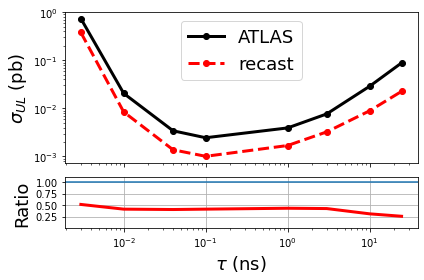

In [6]:
#Define subplots and their properties:
f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[3, 1]})
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#Plot curves
axarr[0].plot(atlasULs['Lifetime_ns'],atlasULs['Observed_limit_pb'],'o-',color='black',linewidth=3.0,label='ATLAS')
axarr[0].plot(recastULs[:,0],recastULs[:,1],'o--',color='red',linewidth=3.0,label='recast')
axarr[0].set_ylabel(r'$\sigma_{UL}$ (pb)', fontsize=18)
axarr[0].set_yscale('log')
axarr[0].set_xscale('log')

#Plot ratio
axarr[1].plot(ratio[:,0],ratio[:,1],color='red',linewidth=3.0)
axarr[1].axhline(y=1.)
axarr[1].set_ylabel('Ratio', fontsize=18) #Y-label
axarr[1].set_xscale('log')
axarr[1].set_xlabel(r'$\tau$ (ns)', fontsize=18)
axarr[1].set_ylim(0.,1.1)
axarr[1].set_yticks([0.25,0.5,0.75,1.0])
axarr[1].grid(True)
axarr[0].legend(fontsize=18)
f.tight_layout()
plt.show()

In [8]:
f.savefig('validationPlot_dm100.png')